In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lazio"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,12,Lazio,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,50.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,12,Lazio,0,0,0,0,0,-2,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-100.00,-100.00
2,2020-02-27T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,428.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,59.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,12,Lazio,3,0,3,0,3,3,3,...,0.0,68.0,0.0,0.0,0.00,100.00,4.41,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2020-12-29T17:00:00,12,Lazio,2854,305,3159,71526,74685,-1385,1218,...,54.0,11196.0,5644.0,-1417.0,9.65,4.23,10.88,21.58,-0.65,-1.82
309,2020-12-30T17:00:00,12,Lazio,2808,303,3111,71352,74463,-222,1333,...,66.0,13678.0,5128.0,-174.0,9.74,4.18,9.75,25.99,-0.66,-0.30
310,2020-12-31T17:00:00,12,Lazio,2789,303,3092,72081,75173,710,1767,...,73.0,16301.0,6272.0,729.0,9.80,4.11,10.84,28.17,0.00,0.95
311,2021-01-01T17:00:00,12,Lazio,2752,305,3057,73304,76361,1188,1913,...,23.0,14480.0,6997.0,1223.0,9.98,4.00,13.21,27.34,0.66,1.58


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 2, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1275
Nuovi tamponi: 9686.0
Percentuale nuovi positivi/nuovi tamponi: 13.200000000000001 %
Nuovi guariti: 1164.0
Nuovi deceduti: 24.0
Variazione positivi ricoverati con sintomi: 40.0
Variazione positivi in terapia intensiva: 10.0
Variazione positivi in isolamento dimiciliare: 37.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 2, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-03T17:00:00,12,Lazio,2192,197,2389,37340,39729,1946,2209,...,21.0,25481.0,19915.0,1774.0,8.25,6.01,8.67,11.09,6.49,5.15
1,2020-11-04T17:00:00,12,Lazio,2317,217,2534,39349,41883,2154,2432,...,34.0,26612.0,22691.0,2009.0,8.56,6.05,9.14,10.72,10.15,5.42
2,2020-11-05T17:00:00,12,Lazio,2508,222,2730,41560,44290,2407,2735,...,35.0,30283.0,25138.0,2211.0,8.13,6.16,9.03,10.88,2.30,5.75
3,2020-11-06T17:00:00,12,Lazio,2511,234,2745,43939,46684,2394,2699,...,26.0,28744.0,21319.0,2379.0,8.52,5.88,9.39,12.66,5.41,5.41
4,2020-11-07T17:00:00,12,Lazio,2619,237,2856,46180,49036,2352,2618,...,27.0,30644.0,26458.0,2241.0,8.30,5.82,8.54,9.89,1.28,5.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-29T17:00:00,12,Lazio,2854,305,3159,71526,74685,-1385,1218,...,54.0,11196.0,5644.0,-1417.0,9.65,4.23,10.88,21.58,-0.65,-1.82
57,2020-12-30T17:00:00,12,Lazio,2808,303,3111,71352,74463,-222,1333,...,66.0,13678.0,5128.0,-174.0,9.74,4.18,9.75,25.99,-0.66,-0.30
58,2020-12-31T17:00:00,12,Lazio,2789,303,3092,72081,75173,710,1767,...,73.0,16301.0,6272.0,729.0,9.80,4.11,10.84,28.17,0.00,0.95
59,2021-01-01T17:00:00,12,Lazio,2752,305,3057,73304,76361,1188,1913,...,23.0,14480.0,6997.0,1223.0,9.98,4.00,13.21,27.34,0.66,1.58


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

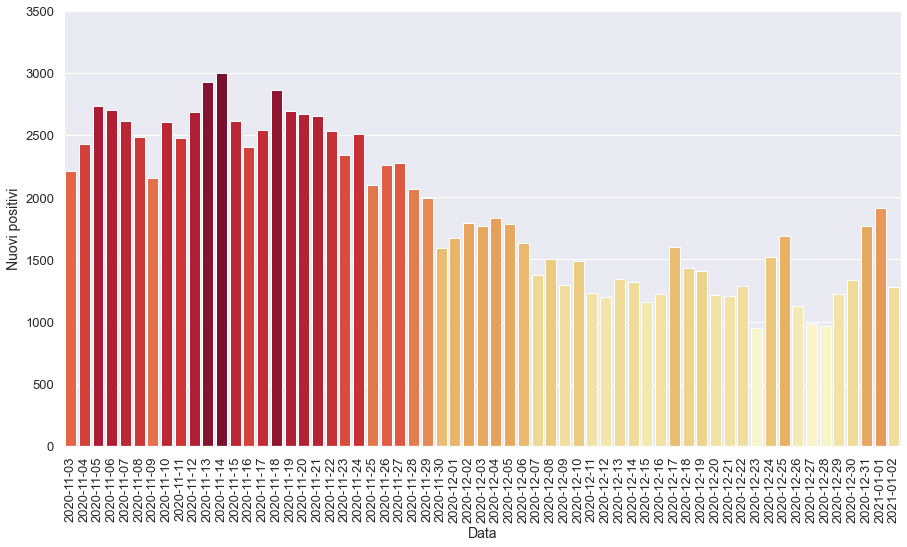

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

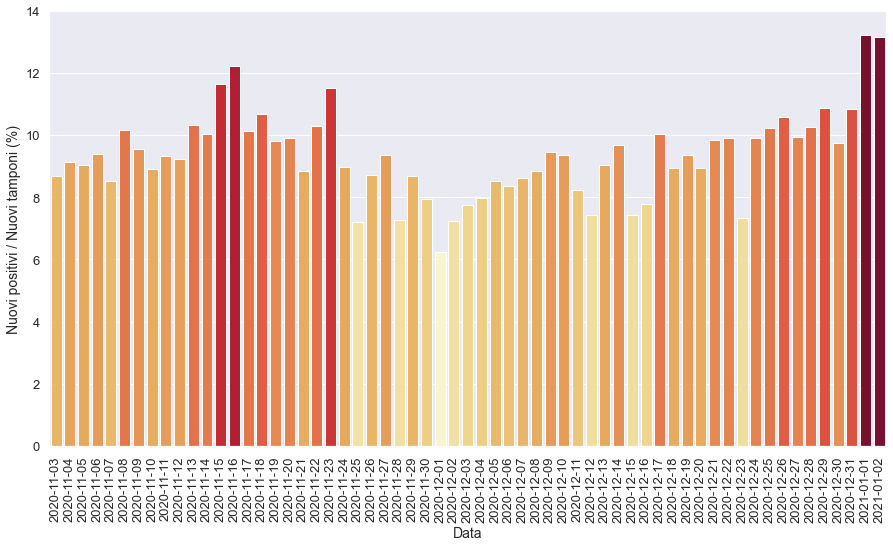

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

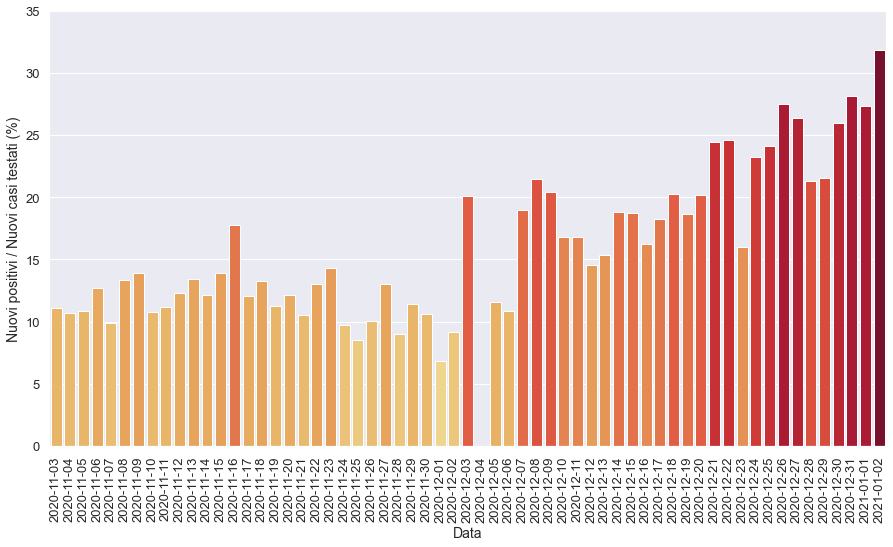

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

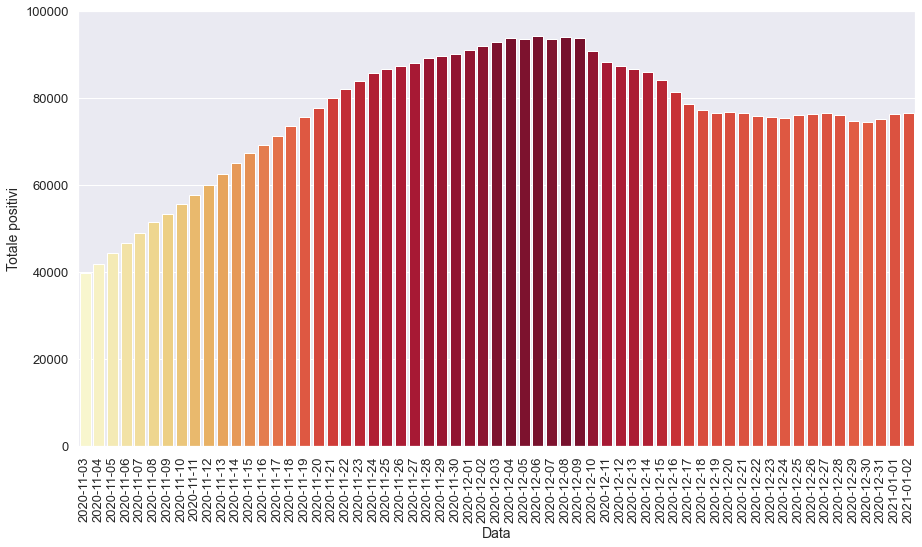

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

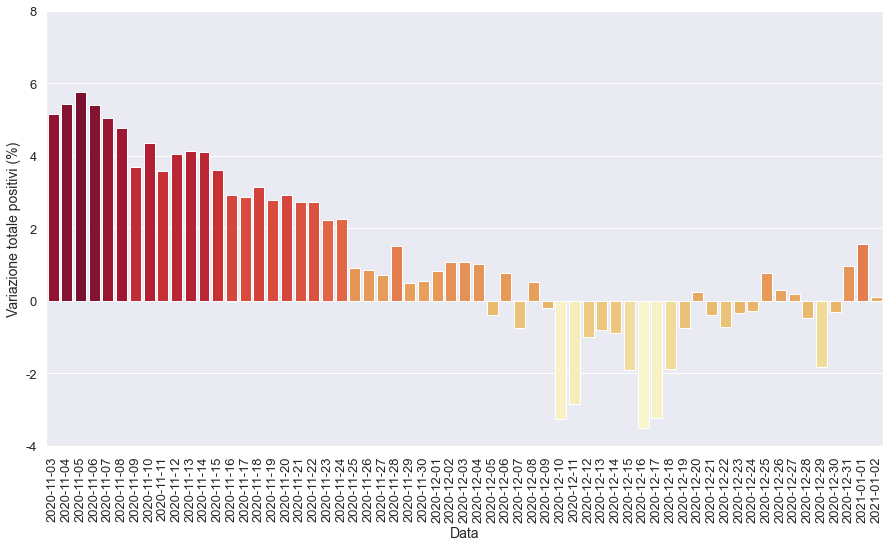

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

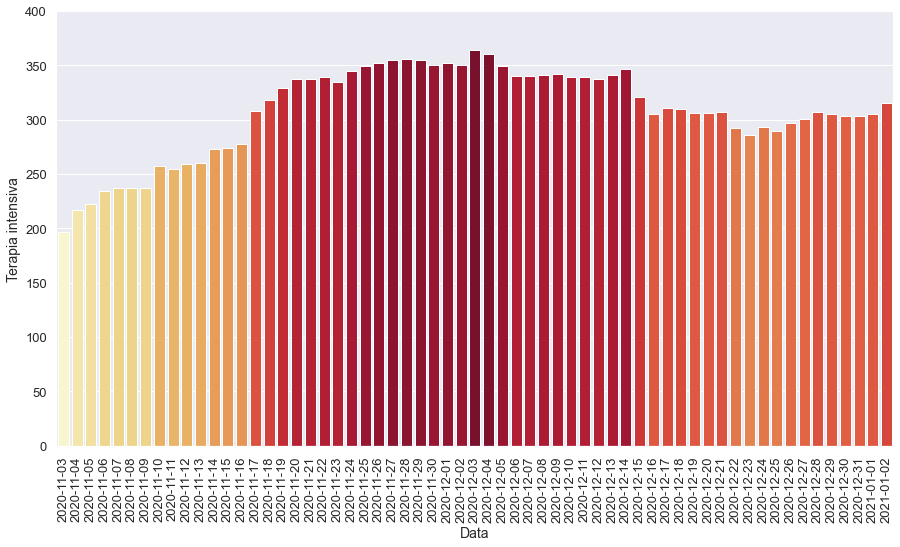

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

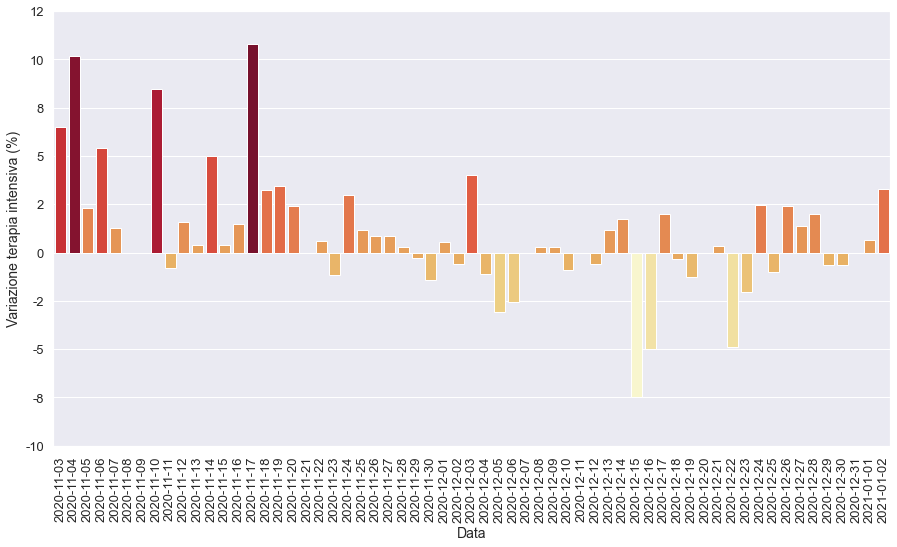

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

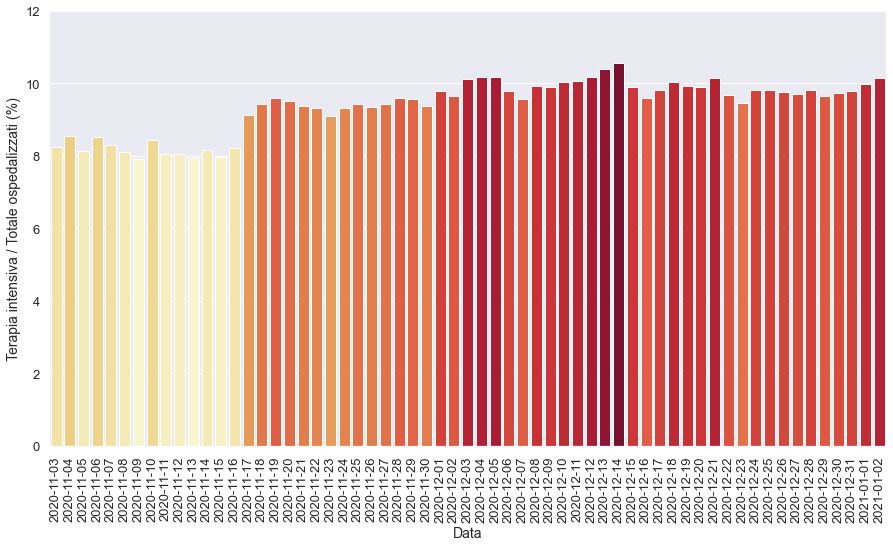

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

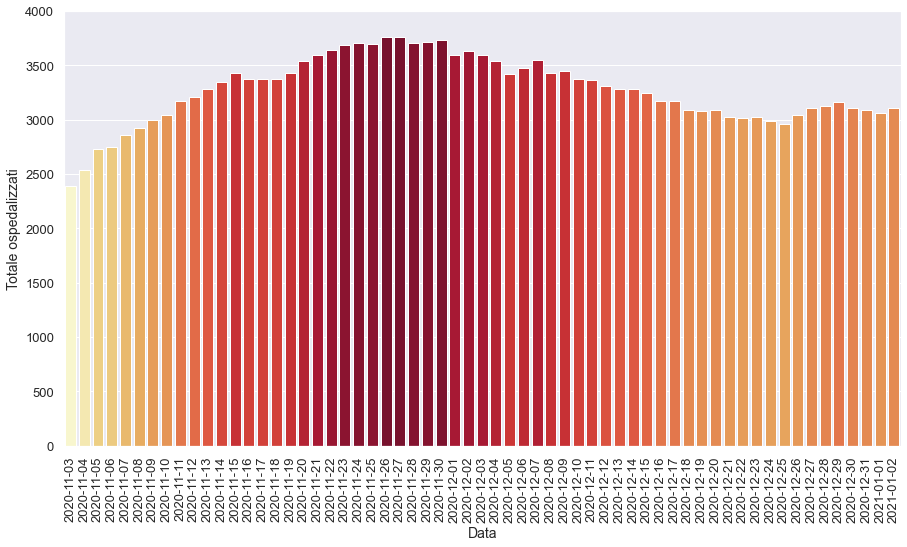

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

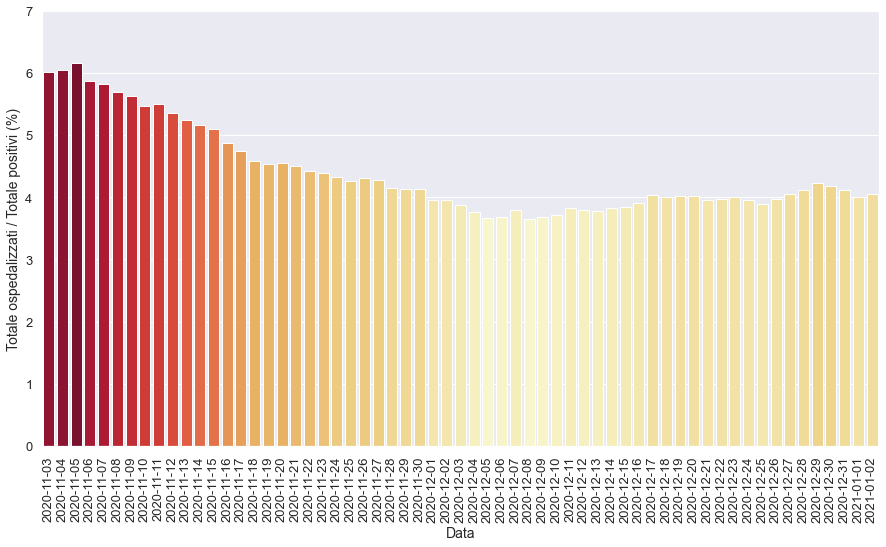

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

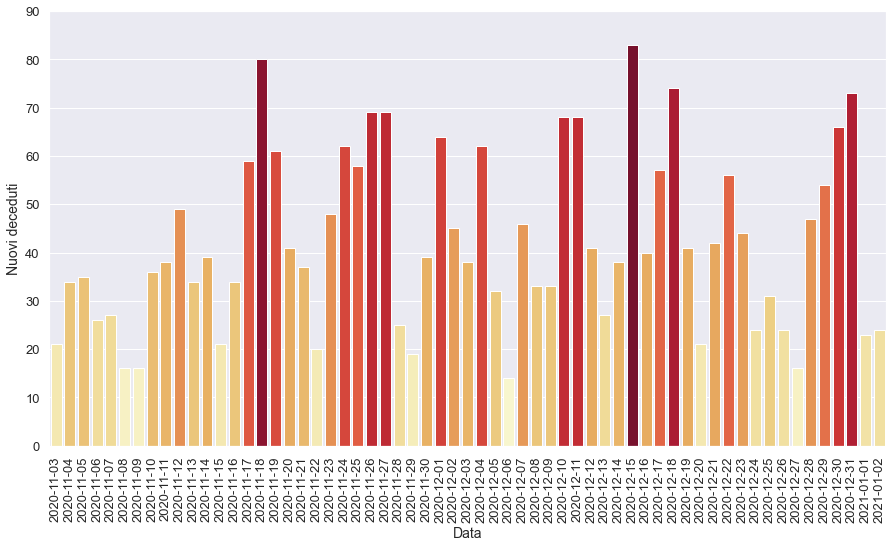

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

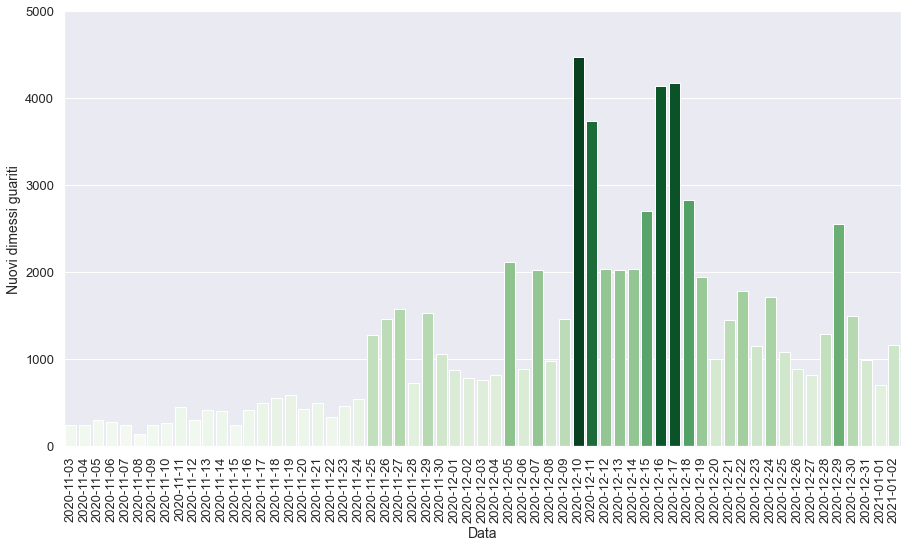

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-03T17:00:00,12,Lazio,3233,364,3597,89282,92879,975,1769,...,38.0,22793.0,8800.0,1010.0,10.12,3.87,7.76,20.10,4.00,1.06
1,2020-12-04T17:00:00,12,Lazio,3178,360,3538,90299,93837,958,1831,...,62.0,22946.0,0.0,1017.0,10.18,3.77,7.98,0.00,-1.10,1.03
2,2020-12-05T17:00:00,12,Lazio,3075,349,3424,90055,93479,-358,1783,...,32.0,20919.0,15386.0,-244.0,10.19,3.66,8.52,11.59,-3.06,-0.38
3,2020-12-06T17:00:00,12,Lazio,3136,340,3476,90735,94211,732,1632,...,14.0,19513.0,15000.0,680.0,9.78,3.69,8.36,10.88,-2.58,0.78
4,2020-12-07T17:00:00,12,Lazio,3209,340,3549,89965,93514,-697,1372,...,46.0,15916.0,7234.0,-770.0,9.58,3.80,8.62,18.97,0.00,-0.74
5,2020-12-08T17:00:00,12,Lazio,3091,341,3432,90577,94009,495,1501,...,33.0,16935.0,7000.0,612.0,9.94,3.65,8.86,21.44,0.29,0.53
6,2020-12-09T17:00:00,12,Lazio,3109,342,3451,90367,93818,-191,1297,...,33.0,13724.0,6338.0,-210.0,9.91,3.68,9.45,20.46,0.29,-0.20
7,2020-12-10T17:00:00,12,Lazio,3036,339,3375,87392,90767,-3051,1488,...,68.0,15916.0,8874.0,-2975.0,10.04,3.72,9.35,16.77,-0.88,-3.25
8,2020-12-11T17:00:00,12,Lazio,3026,339,3365,84828,88193,-2574,1230,...,68.0,14917.0,7330.0,-2564.0,10.07,3.82,8.25,16.78,0.00,-2.84
9,2020-12-12T17:00:00,12,Lazio,2969,337,3306,84012,87318,-875,1194,...,41.0,16086.0,8224.0,-816.0,10.19,3.79,7.42,14.52,-0.59,-0.99


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

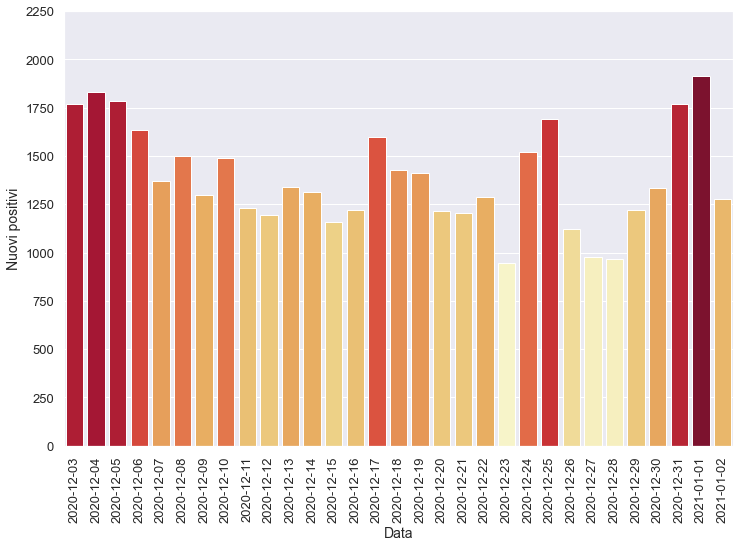

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

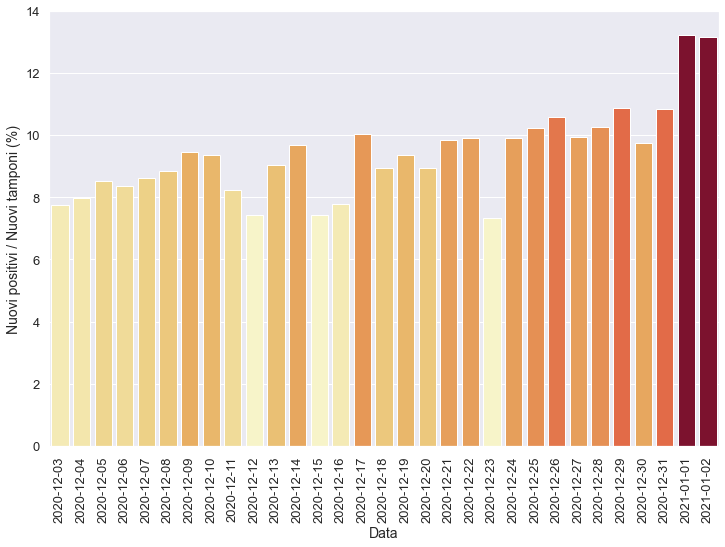

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

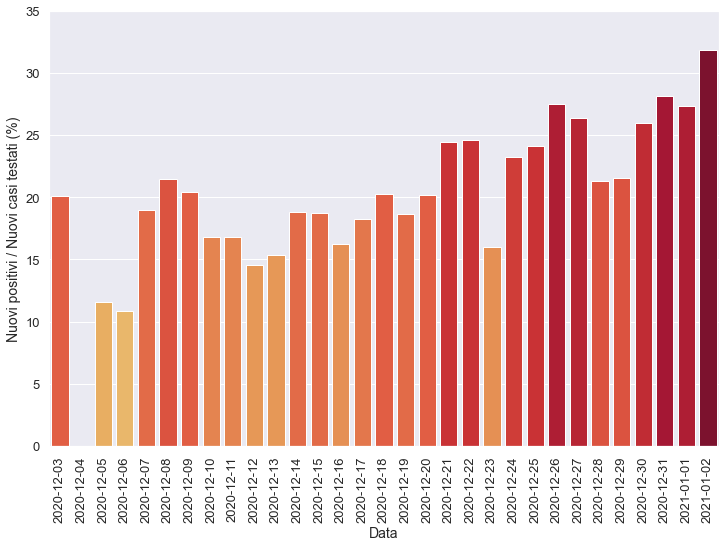

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

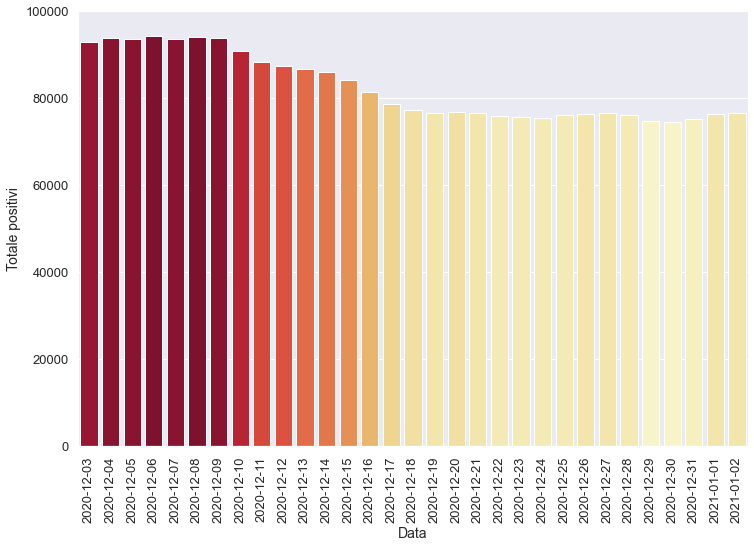

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

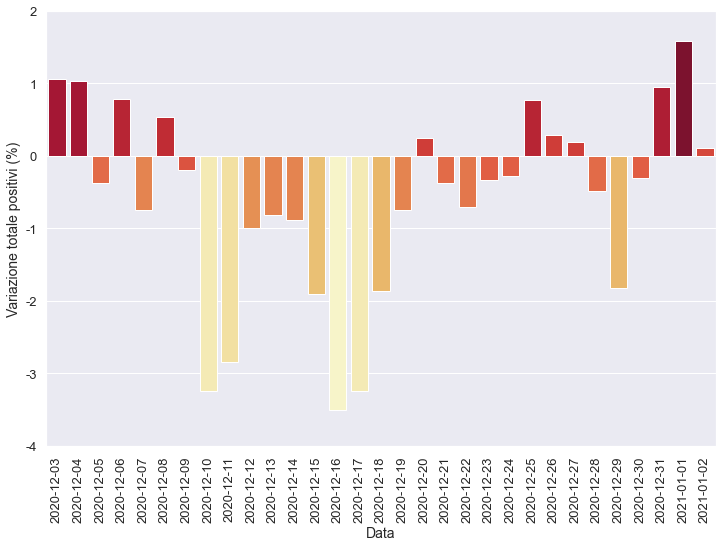

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

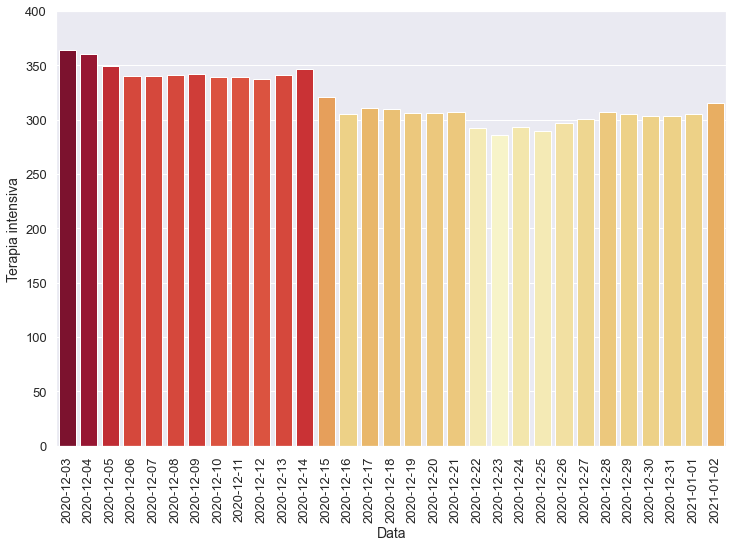

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

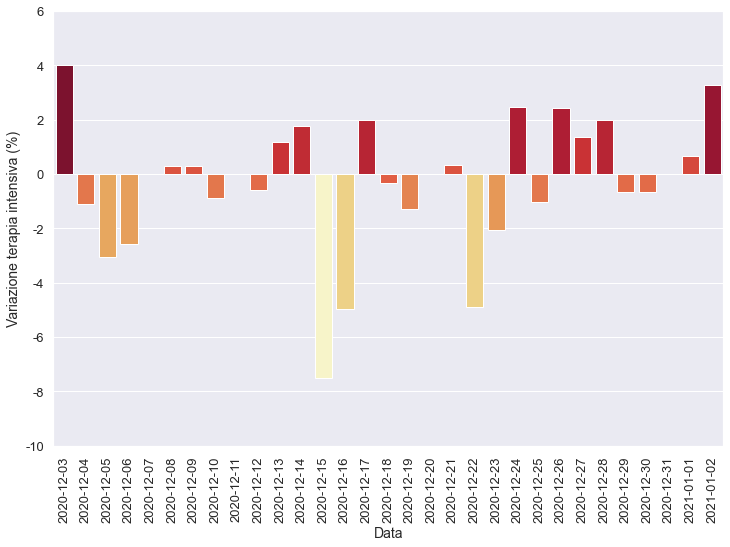

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

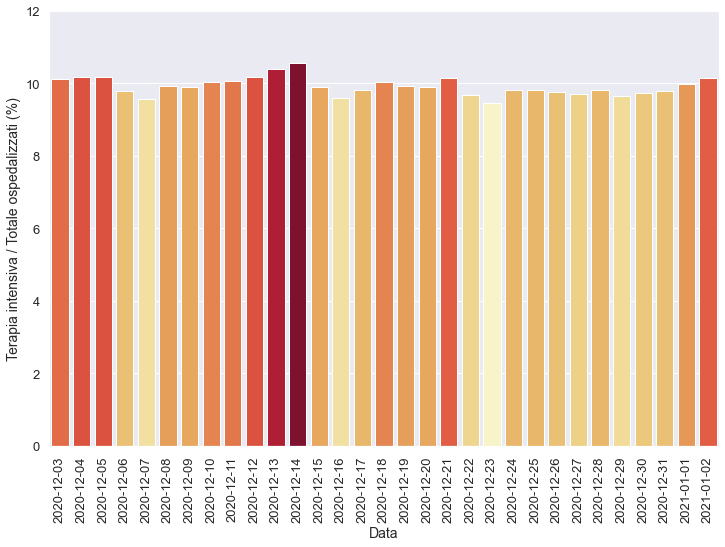

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

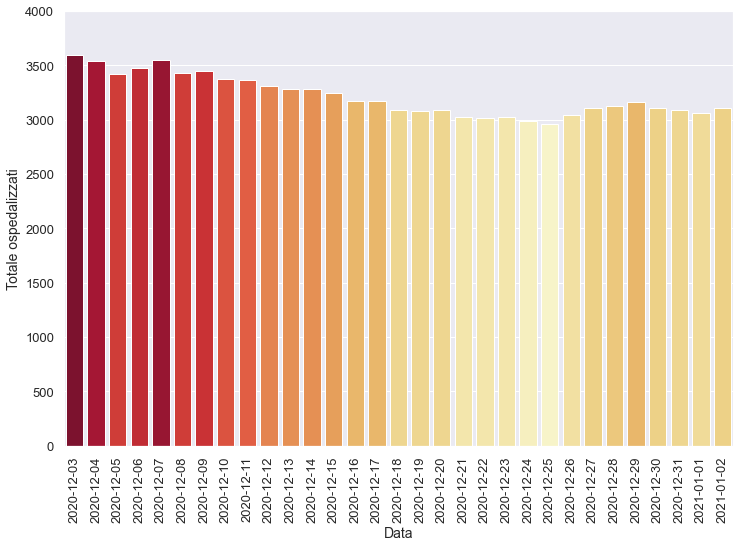

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

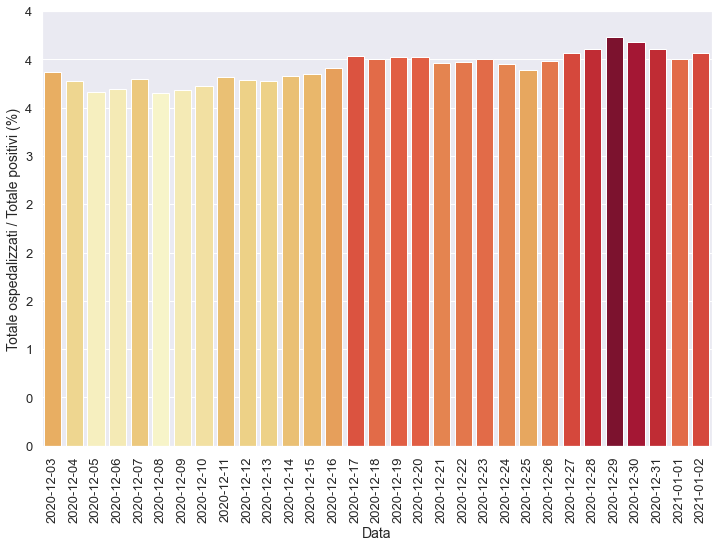

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

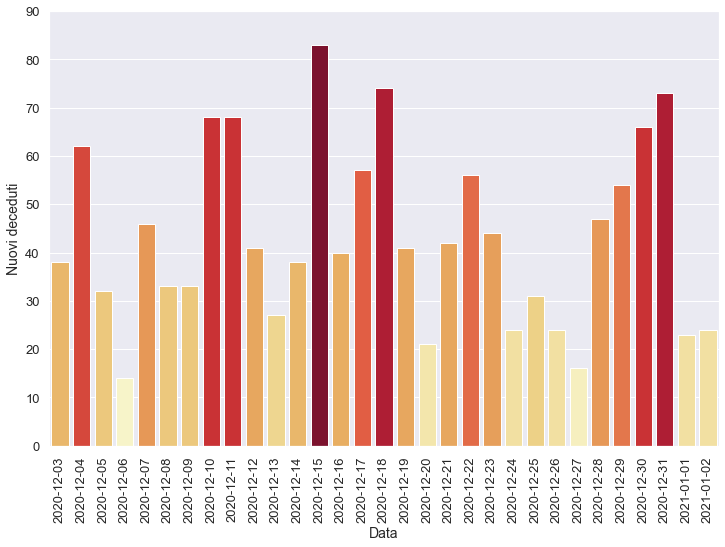

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

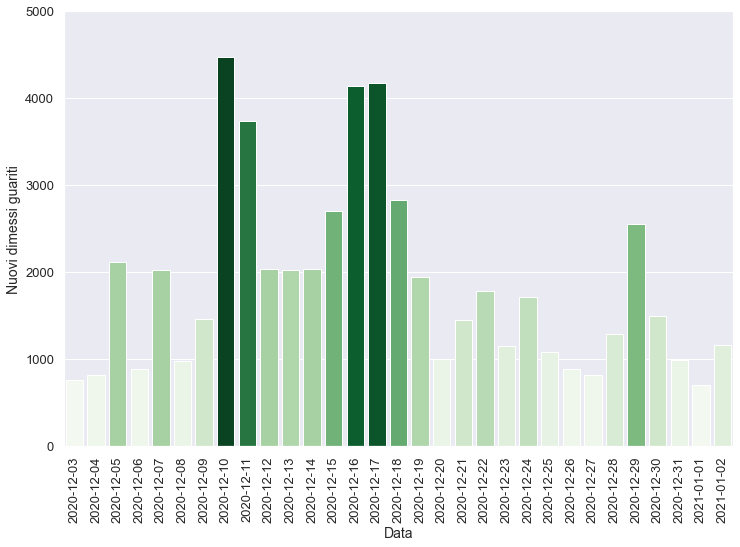

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-26T17:00:00,12,Lazio,2742,297,3039,73255,76294,220,1123,...,24.0,10594.0,4082.0,137.0,9.77,3.98,10.60,27.51,2.41,0.29
1,2020-12-27T17:00:00,12,Lazio,2802,301,3103,73335,76438,144,977,...,16.0,9815.0,3702.0,80.0,9.70,4.06,9.95,26.39,1.35,0.19
2,2020-12-28T17:00:00,12,Lazio,2820,307,3127,72943,76070,-368,966,...,47.0,9414.0,4529.0,-392.0,9.82,4.11,10.26,21.33,1.99,-0.48
3,2020-12-29T17:00:00,12,Lazio,2854,305,3159,71526,74685,-1385,1218,...,54.0,11196.0,5644.0,-1417.0,9.65,4.23,10.88,21.58,-0.65,-1.82
4,2020-12-30T17:00:00,12,Lazio,2808,303,3111,71352,74463,-222,1333,...,66.0,13678.0,5128.0,-174.0,9.74,4.18,9.75,25.99,-0.66,-0.30
5,2020-12-31T17:00:00,12,Lazio,2789,303,3092,72081,75173,710,1767,...,73.0,16301.0,6272.0,729.0,9.80,4.11,10.84,28.17,0.00,0.95
6,2021-01-01T17:00:00,12,Lazio,2752,305,3057,73304,76361,1188,1913,...,23.0,14480.0,6997.0,1223.0,9.98,4.00,13.21,27.34,0.66,1.58
7,2021-01-02T17:00:00,12,Lazio,2792,315,3107,73341,76448,87,1275,...,24.0,9686.0,4004.0,37.0,10.14,4.06,13.16,31.84,3.28,0.11


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

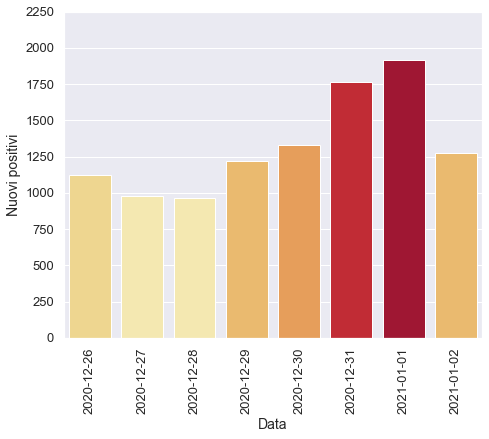

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

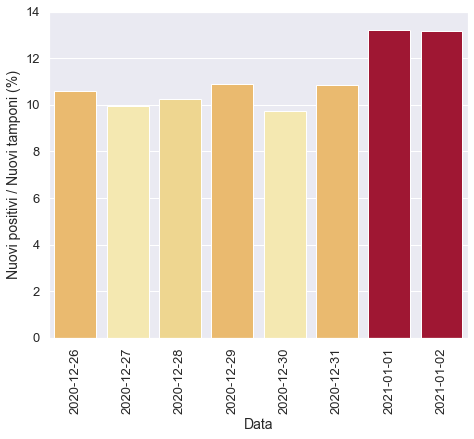

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

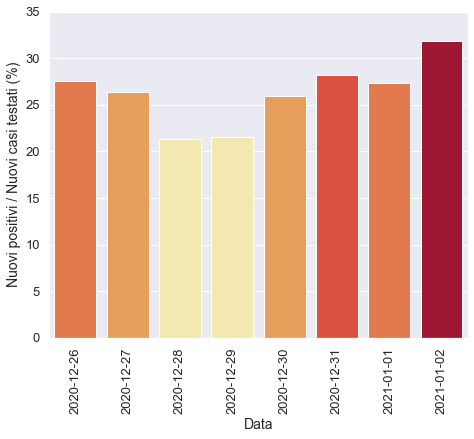

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

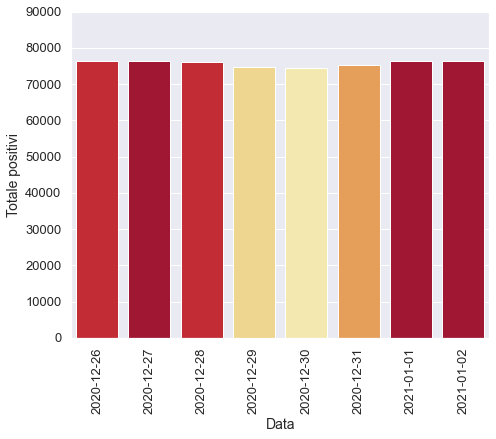

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

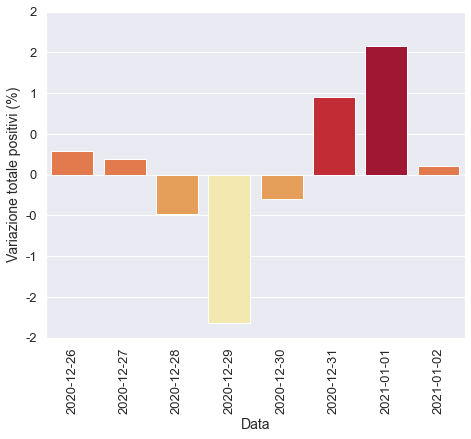

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

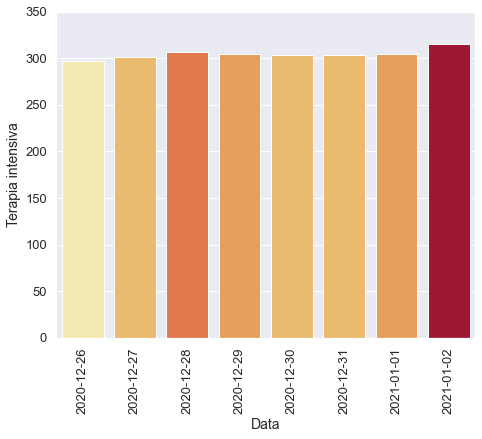

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

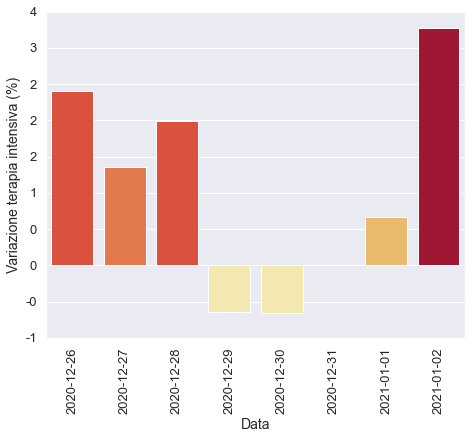

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

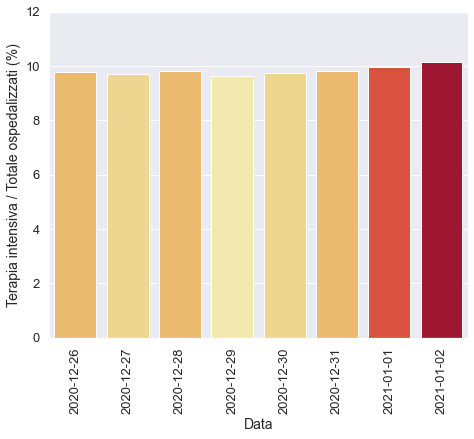

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

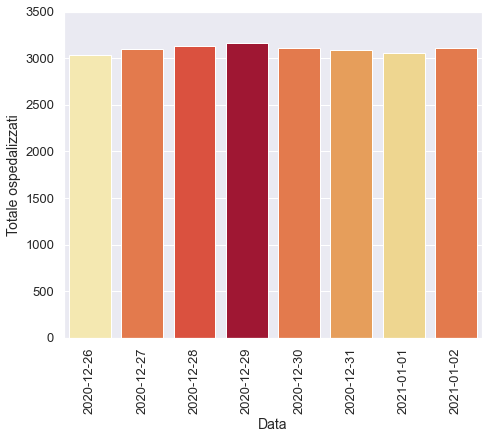

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

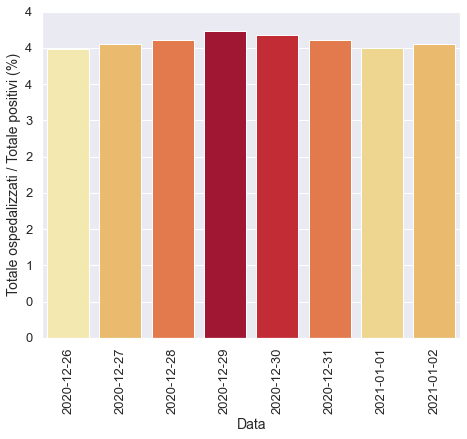

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

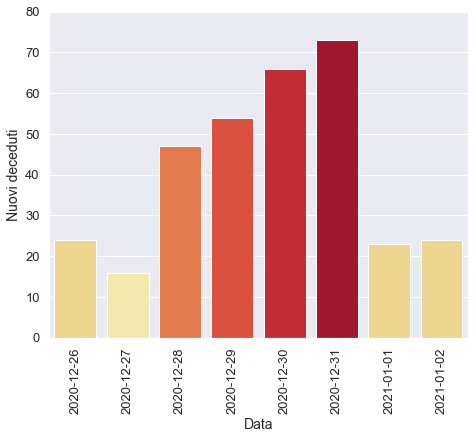

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

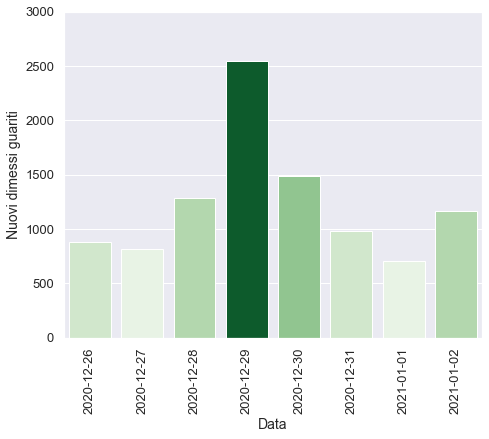

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)